In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("FDI data.csv")

In [5]:
df_long = df.melt(id_vars=['Sector'], var_name='Year', value_name='FDI')

In [7]:
df_long['Year'] = pd.to_datetime(df_long['Year'].str[:4] + '-04-01')

In [9]:
yearly_fdi = df_long.groupby('Year')['FDI'].sum().reset_index()

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

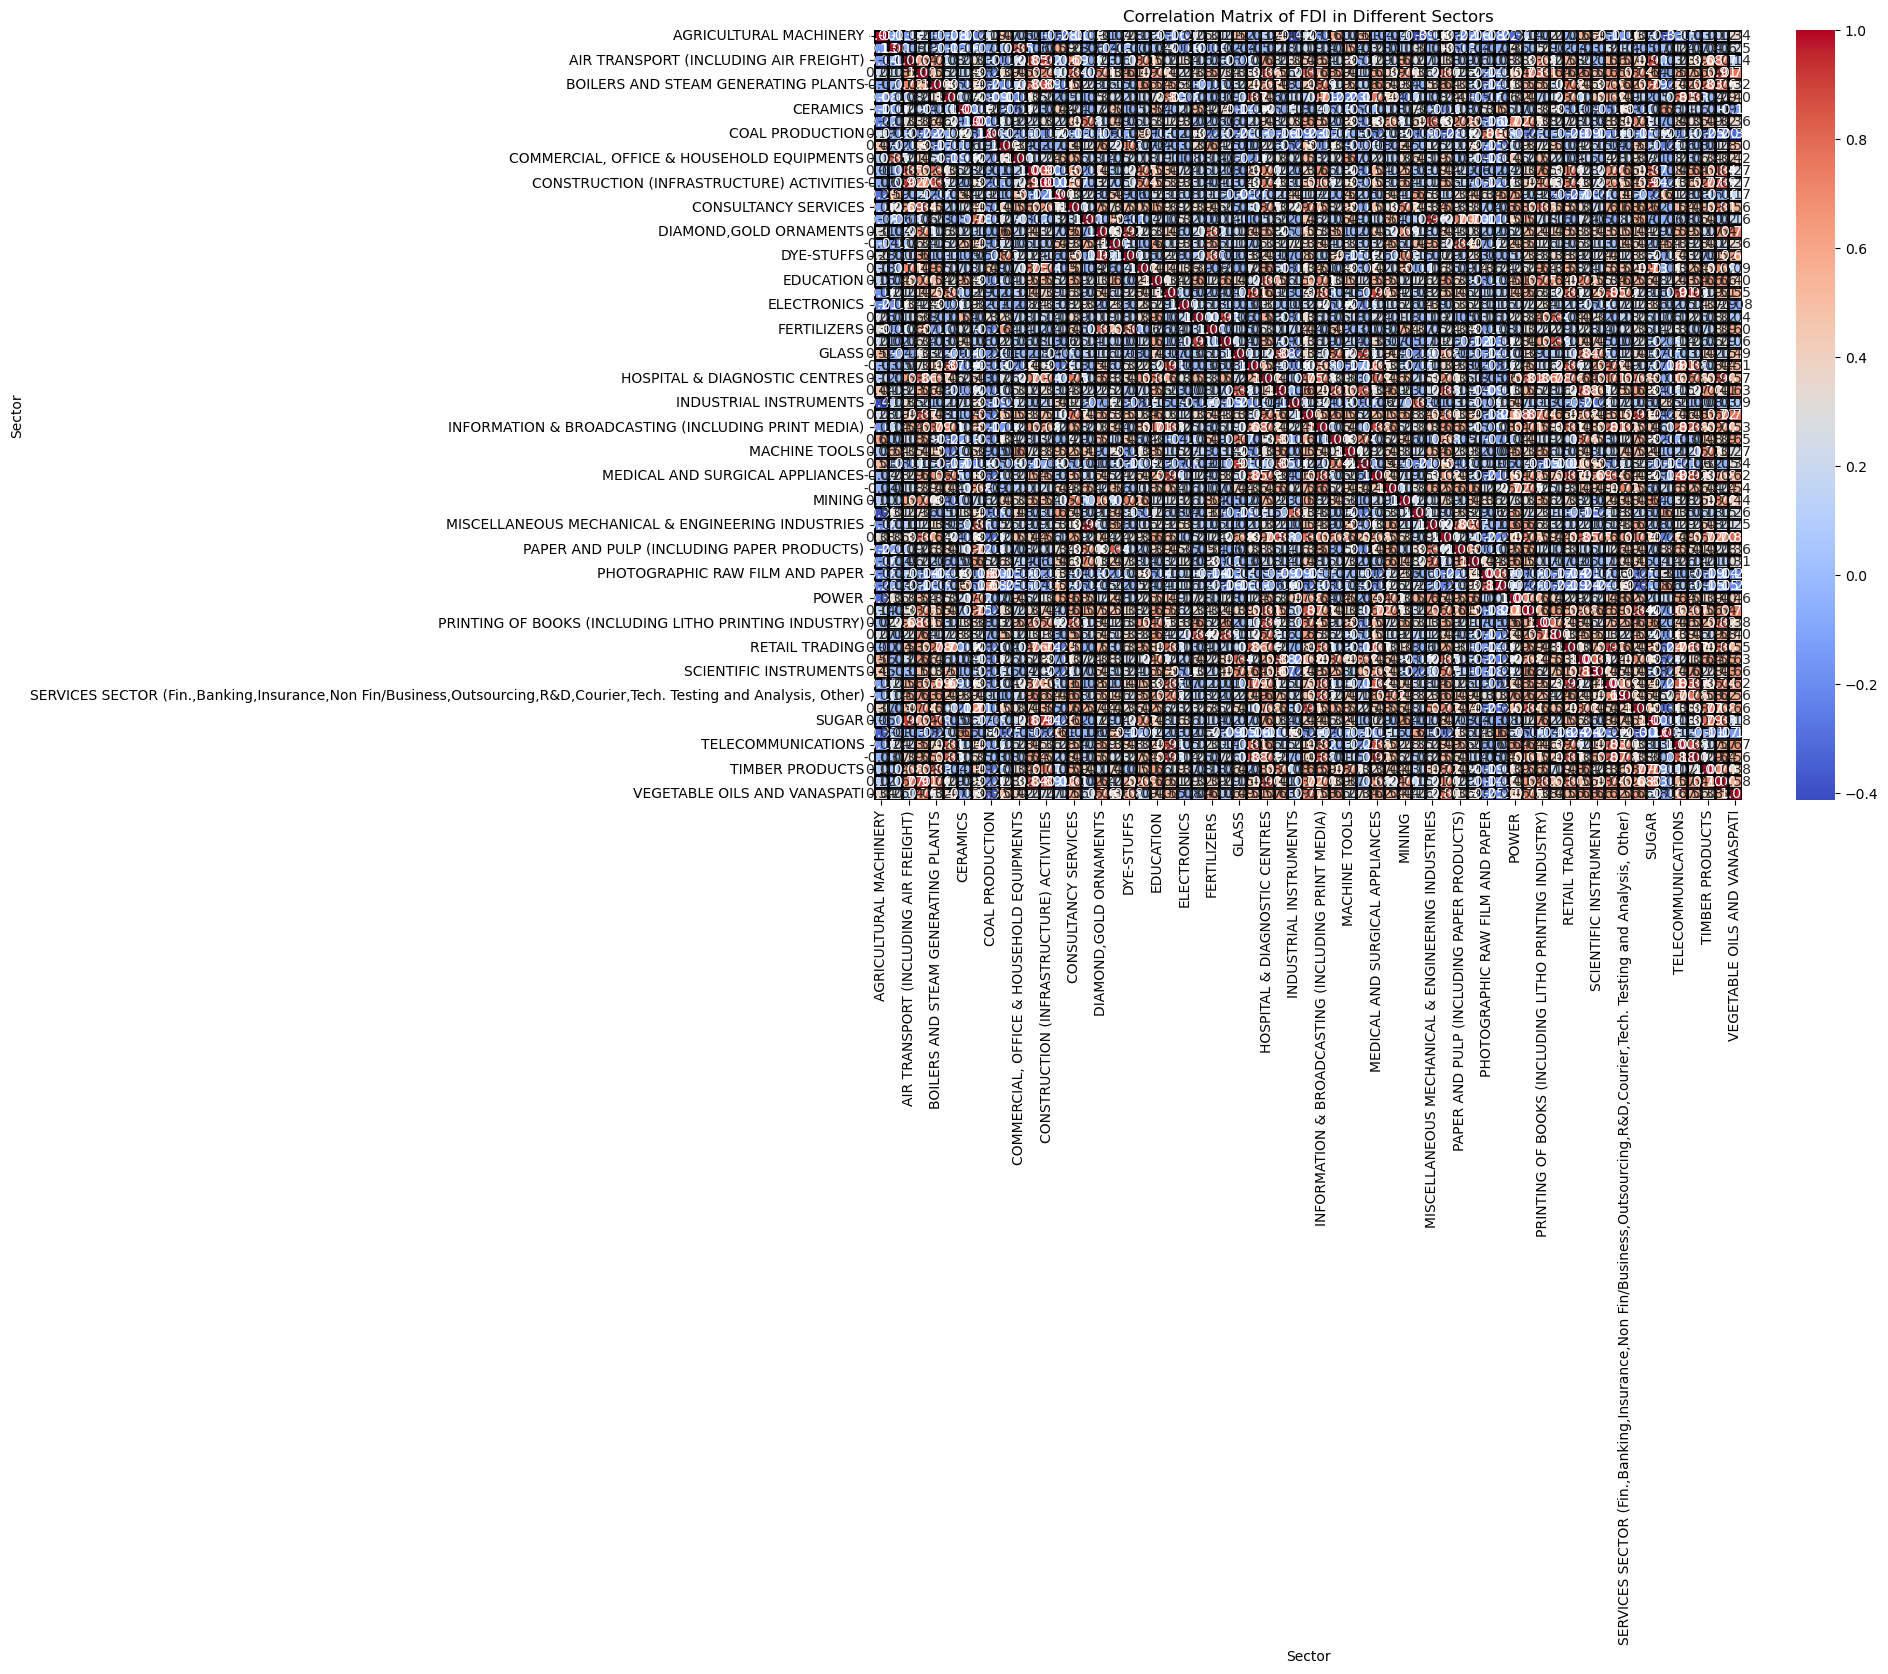

In [15]:
sector_year_df = df_long.pivot(index='Year', columns='Sector', values='FDI').fillna(0)
corr_matrix = sector_year_df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",linewidths=1, linecolor='black')
plt.title('Correlation Matrix of FDI in Different Sectors')
plt.show()

In [17]:
total_fdi_per_sector = df_long.groupby('Sector')['FDI'].sum().reset_index()

In [19]:
print(total_fdi_per_sector)


                                   Sector       FDI
0                  AGRICULTURAL MACHINERY    449.20
1                    AGRICULTURE SERVICES   1920.75
2   AIR TRANSPORT (INCLUDING AIR FREIGHT)   1014.44
3                     AUTOMOBILE INDUSTRY  16673.92
4     BOILERS AND STEAM GENERATING PLANTS    195.15
..                                    ...       ...
58                     TELECOMMUNICATIONS  23946.01
59      TEXTILES (INCLUDING DYED,PRINTED)   2471.41
60                        TIMBER PRODUCTS    157.68
61                                TRADING  14210.88
62           VEGETABLE OILS AND VANASPATI    697.50

[63 rows x 2 columns]


                                                 Sector       Year      FDI  \
0                              METALLURGICAL INDUSTRIES 2000-04-01    22.69   
1                                                MINING 2000-04-01     1.32   
2                                                 POWER 2000-04-01    89.42   
3                               NON-CONVENTIONAL ENERGY 2000-04-01     0.00   
4                                       COAL PRODUCTION 2000-04-01     0.00   
...                                                 ...        ...      ...   
1066  PRINTING OF BOOKS (INCLUDING LITHO PRINTING IN... 2016-04-01    53.17   
1067                                               COIR 2016-04-01     0.00   
1068           CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES 2016-04-01  1860.73   
1069  CONSTRUCTION DEVELOPMENT: Townships, housing, ... 2016-04-01   105.14   
1070                           MISCELLANEOUS INDUSTRIES 2016-04-01   296.40   

      YoY_Growth  
0            NaN  
1            

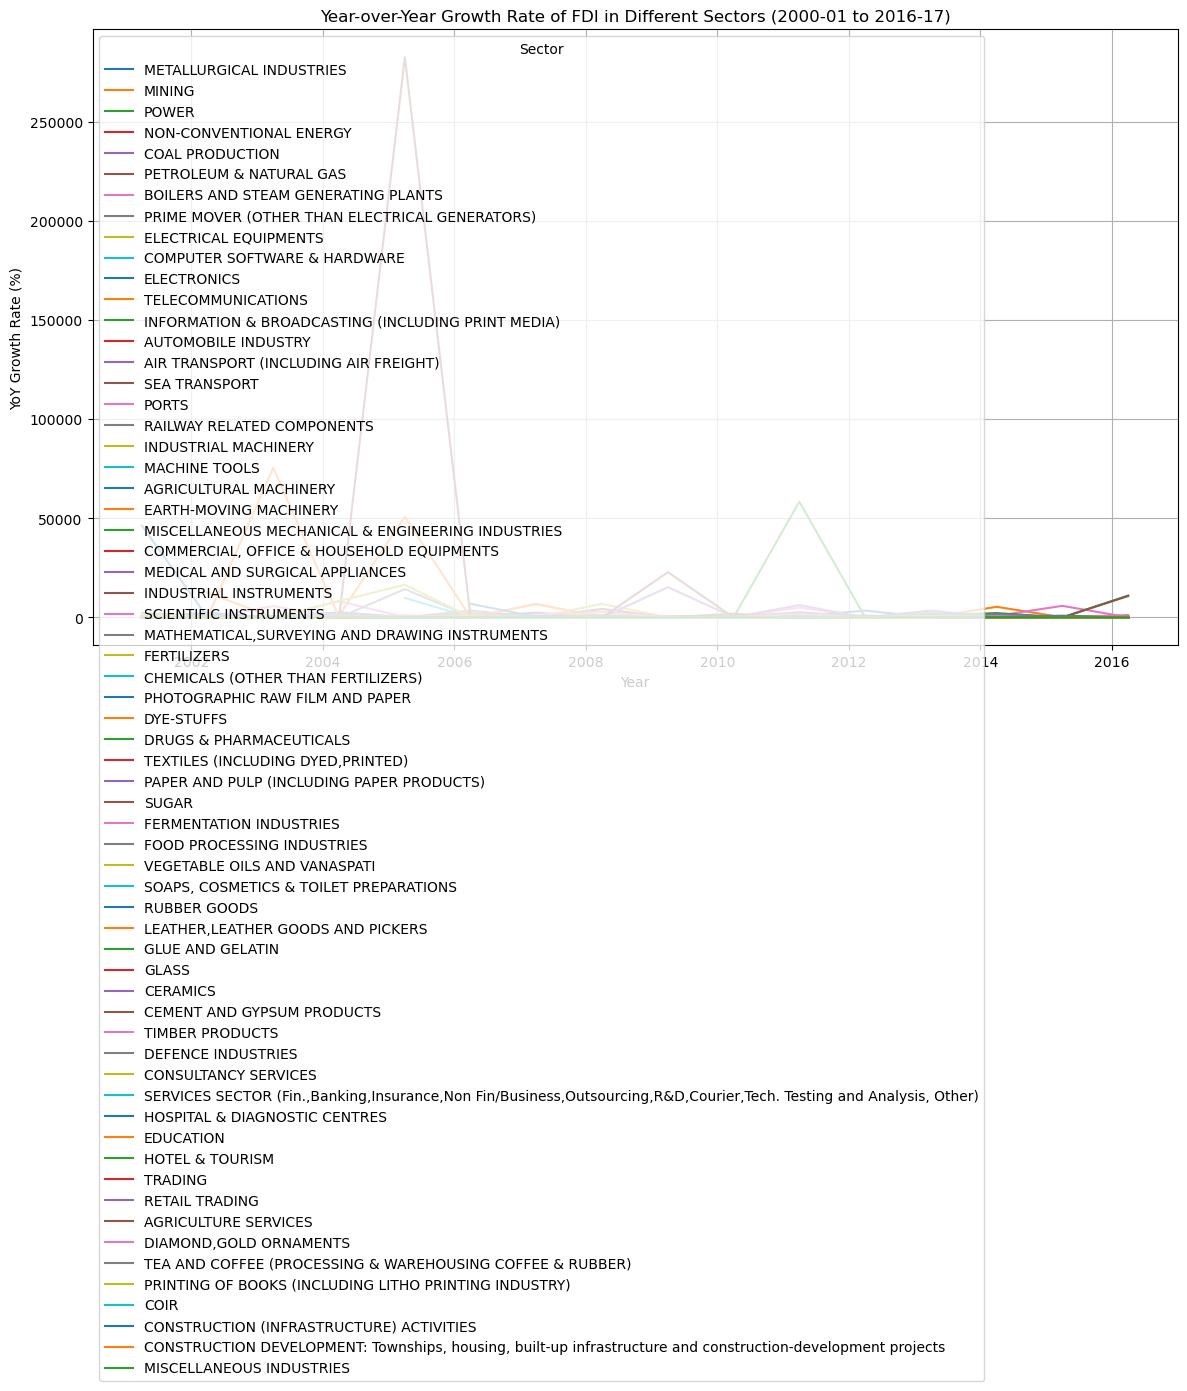

In [21]:
df_long['YoY_Growth'] = df_long.groupby('Sector')['FDI'].pct_change() * 100

print(df_long)

plt.figure(figsize=(14, 8))
for sector in df_long['Sector'].unique():
    sns.lineplot(data=df_long[df_long['Sector'] == sector], x='Year', y='YoY_Growth', label=sector)

plt.title('Year-over-Year Growth Rate of FDI in Different Sectors (2000-01 to 2016-17)')
plt.xlabel('Year')
plt.ylabel('YoY Growth Rate (%)')
plt.legend(title='Sector')
plt.grid(True)
plt.show()